In [40]:
import pandas as pd 
import plotly.express as px 
from sklearn.model_selection import train_test_split, RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_recall_curve,accuracy_score,confusion_matrix
from xgboost import XGBClassifier
import numpy as np
import time

In [22]:
df = pd.read_csv(r"C:\Users\user\Desktop\diabetes_risk_prediction_dataset.csv")
df['class'].replace(to_replace=['Positive','Negative'],value=[1,0],inplace=True)

In [3]:
#Checking the shape of the dataframe 
df.shape

(520, 17)

The dataframe consist of 520 rows and 17 columns 

In [23]:
# Checking the data structure and the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
# Checking for null and duplicated values 
print('The sum of all null values:', df.isnull().sum())
print('The sum of duplicated values:', df.duplicated().sum())

The sum of all null values: Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64
The sum of duplicated values: 269


There are no null values in the dataset but we have 269 duplicates but for the sake of our predictive analysis we are not going to drop them as they are going to cause omission while learning the data 

In [11]:
# Check the describtive analysis 
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [24]:
# splitting the data into dependent variable and independent variables 
X = df.drop(['class'],axis=1)
x = pd.get_dummies(X,drop_first=True).astype(int)
y = df['class']

In [25]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)


In [26]:
rf_model = RandomForestClassifier()

In [27]:
start_time = time.time()
print(rf_model.fit(x_train,y_train))
end_time=time.time()
print('Run Time:', end_time - start_time)

RandomForestClassifier()
Run Time: 1.393082618713379


In [43]:
print('The F1_Score for the rf_model:', f1_score(y,rf_model.predict(x)))
print('The Accuracy Score for the rf_model:', accuracy_score(y,rf_model.predict(x)))
print('The Confusion Matrix for rf_model:')
print(confusion_matrix(y,rf_model.predict(x)))
print('Cross Validation score of the rf_mode:')
start_time=time.time()
print(cross_val_score(rf_model,x,y,cv=5))
end_time = time.time()
print('Cross Validation Run Time:', end_time - start_time)
print('The Mean Cross Validation for the rf_model:')
print(np.mean(cross_val_score(rf_model,x,y,cv=5)))
print('The Precision_Recall_Curve:')
print(precision_recall_curve(y,rf_model.predict(x)))
      

The F1_Score for the rf_model: 0.9984350547730829
The Accuracy Score for the rf_model: 0.9980769230769231
The Confusion Matrix for rf_model:
[[200   0]
 [  1 319]]
Cross Validation score of the rf_mode:
[0.97115385 1.         0.93269231 0.99038462 1.        ]
Cross Validation Run Time: 5.1349499225616455
The Mean Cross Validation for the rf_model:
0.973076923076923
The Precision_Recall_Curve:
(array([0.61538462, 1.        , 1.        ]), array([1.      , 0.996875, 0.      ]), array([0, 1], dtype=int64))


In [98]:
## Hypertuning Randomforestclassifier model 
parameters={
    'n_estimators':[10,20,30,40,50,60,70,80,90,100],
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6],
    'min_samples_split':[2,3,4,5,6,7,8],
    'min_samples_leaf':[2,3,4,5,6,7,8]
}
start_time=time.time()
hrf=RandomizedSearchCV(rf_model,parameters,cv=5,n_jobs=-1)
hrf.fit(x_train,y_train)
best_rf = hrf.best_estimator_
print(best_rf)
end_time= time.time()
print('Hypertuning runtime:',end_time - start_time)

RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=60)
Hypertuning runtime: 9.14722728729248


F1_Score of Hypertuned randomforest model:
0.9671361502347419
Accuracy Score of Hypertuned randomforest model:
0.9596153846153846
Confusion Matrix of Hypertuned randomforest model:
[[190  10]
 [ 11 309]]
Precision_Recall_Curve of Hypertuned randomforest model:
(array([0.61538462, 0.96865204, 1.        ]), array([1.      , 0.965625, 0.      ]), array([0, 1], dtype=int64))
   precision    recall
0   0.615385  1.000000
1   0.971154  0.946875
2   1.000000  0.000000


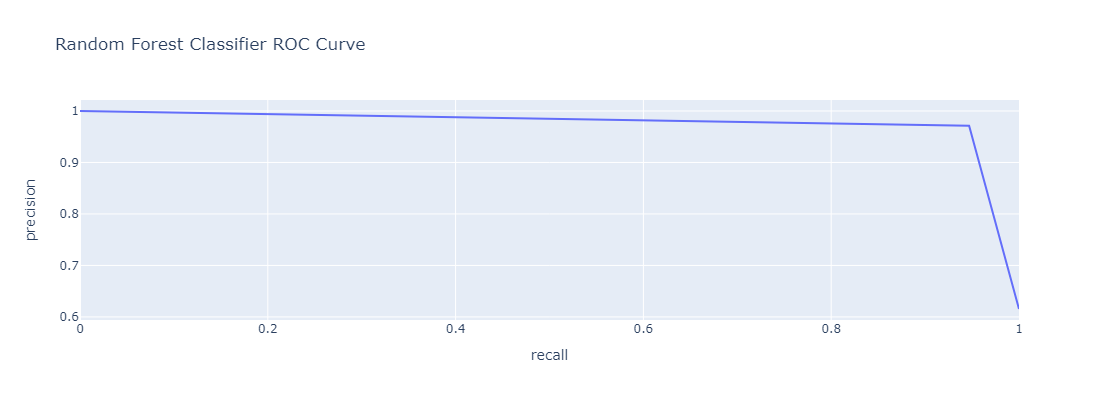

In [116]:
rf_predict = best_rf.predict(x)
print('F1_Score of Hypertuned randomforest model:')
print(f1_score(y,rf_predict))
print('Accuracy Score of Hypertuned randomforest model:')
print(accuracy_score(y,rf_predict))
print('Confusion Matrix of Hypertuned randomforest model:')
print(confusion_matrix(y,rf_predict))
print('Precision_Recall_Curve of Hypertuned randomforest model:')
print(precision_recall_curve(y,rf_predict))
ROC = {'precision':[0.61538462, 0.97115385, 1],'recall':[1.      , 0.946875, 0]}
ROC_df = pd.DataFrame(ROC)
print(ROC_df)
ROC_curve = px.line(ROC_df,x='recall',y='precision',title='Random Forest Classifier ROC Curve',width=500,height=400)
ROC_curve.show()

In [59]:
start_time=time.time()
gbc_model = GradientBoostingClassifier()
print(gbc_model)
gbc_model.fit(x_train,y_train)
end_time = time.time()
print('Run Time:',end_time - start_time)

GradientBoostingClassifier()
Run Time: 1.484147310256958


In [71]:
print('The F1_Score for the gbc_model:', f1_score(y,gbc_model.predict(x)))
print('The Accuracy Score for the gbc_model:', accuracy_score(y,gbc_model.predict(x)))
print('The Confusion Matrix for gbc_model:')
print(confusion_matrix(y,gbc_model.predict(x)))
print('Cross Validation score of the gbc_mode:')
start_time=time.time()
print(cross_val_score(gbc_model,x,y,cv=5))
end_time = time.time()
print('Cross Validation Run Time:', end_time - start_time)
print('The Mean Cross Validation for the gbc_model:')
print(np.mean(cross_val_score(gbc_model,x,y,cv=5)))
print('The Precision_Recall_Curve:')
print(precision_recall_curve(y,gbc_model.predict(x)))

The F1_Score for the gbc_model: 0.9968652037617556
The Accuracy Score for the gbc_model: 0.9961538461538462
The Confusion Matrix for gbc_model:
[[200   0]
 [  2 318]]
Cross Validation score of the gbc_mode:
[0.94230769 0.98076923 0.93269231 0.99038462 0.99038462]
Cross Validation Run Time: 3.586169719696045
The Mean Cross Validation for the gbc_model:
0.9673076923076923
The Precision_Recall_Curve:
(array([0.61538462, 1.        , 1.        ]), array([1.     , 0.99375, 0.     ]), array([0, 1], dtype=int64))


In [66]:
## Hypertuning Randomforestclassifier model 
parameters={
    'learning_rate':[0.01,0.1,1,10,100],
    'n_estimators':[10,20,30,40,50,60,70,80,90,100],
    'max_depth':[2,4,6,8],
    'min_samples_split':[2,3,4,5,6,7,8],
    'min_samples_leaf':[2,3,4,5,6,7,8]
}
start_time=time.time()
hgb=RandomizedSearchCV(gbc_model,parameters,cv=5,n_jobs=-1)
hgb.fit(x_train,y_train)
best_gb = hgb.best_estimator_
print(best_gb)
end_time= time.time()
print('Hypertuning runtime:',end_time - start_time)

GradientBoostingClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=7,
                           n_estimators=60)
Hypertuning runtime: 4.785484790802002


F1_Score of Hypertuned GradientBoostingClassifier model:
0.9968652037617556
Accuracy Score of Hypertuned GradientBoostingClassifier model:
0.9961538461538462
Confusion Matrix of Hypertuned GradientBoostingClassifier model:
[[200   0]
 [  2 318]]
Precision_Recall_Curve of Hypertuned GradientBoostingClassifier model:
(array([0.61538462, 1.        , 1.        ]), array([1.     , 0.99375, 0.     ]), array([0, 1], dtype=int64))
   precision   recall
0   0.615385  1.00000
1   1.000000  0.99375
2   1.000000  0.00000


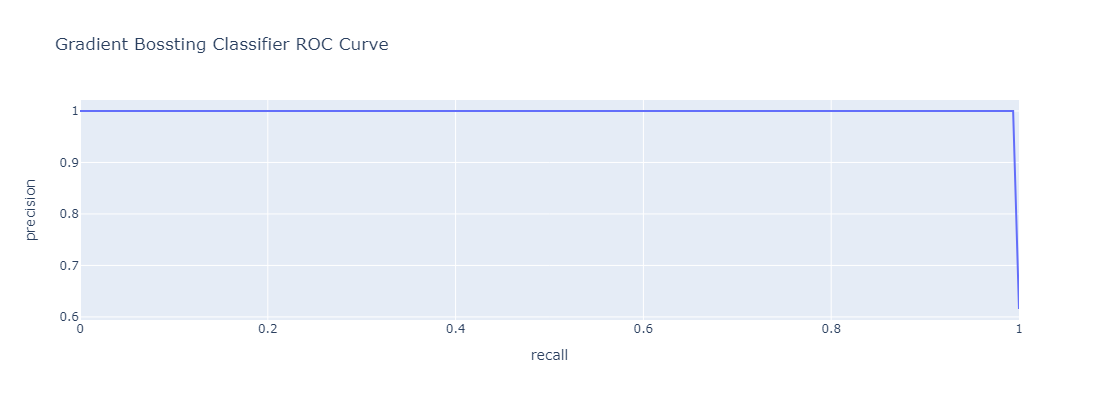

In [115]:
gb_predict = best_gb.predict(x)
print('F1_Score of Hypertuned GradientBoostingClassifier model:')
print(f1_score(y,gb_predict))
print('Accuracy Score of Hypertuned GradientBoostingClassifier model:')
print(accuracy_score(y,gb_predict))
print('Confusion Matrix of Hypertuned GradientBoostingClassifier model:')
print(confusion_matrix(y,gb_predict))
print('Precision_Recall_Curve of Hypertuned GradientBoostingClassifier model:')
ROC_data = precision_recall_curve(y,gb_predict)
print(ROC_data)
ROC = {'precision':[0.61538462, 1.        , 1],'recall':[1.     , 0.99375, 0]}
ROC_df = pd.DataFrame(ROC)
print(ROC_df)
ROC_curve = px.line(ROC_df,x='recall',y='precision',title='Gradient Bossting Classifier ROC Curve',width=500,height=400)
ROC_curve.show()

In [70]:
start_time=time.time()
xgb_model = XGBClassifier()
print(xgb_model)
xgb_model.fit(x_train,y_train)
end_time = time.time()
print('Run Time:',end_time - start_time)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Run Time: 0.8308310508728027


In [73]:
print('The F1_Score for the xgb_model:', f1_score(y,xgb_model.predict(x)))
print('The Accuracy Score for the xgb_model:', accuracy_score(y,xgb_model.predict(x)))
print('The Confusion Matrix for xgb_model:')
print(confusion_matrix(y,xgb_model.predict(x)))
print('Cross Validation score of the xgb_mode:')
start_time=time.time()
print(cross_val_score(xgb_model,x,y,cv=5))
end_time = time.time()
print('Cross Validation Run Time:', end_time - start_time)
print('The Mean Cross Validation for the xgb_model:')
print(np.mean(cross_val_score(xgb_model,x,y,cv=5)))
print('The Precision_Recall_Curve:')
print(precision_recall_curve(y,xgb_model.predict(x)))

The F1_Score for the xgb_model: 0.9952904238618524
The Accuracy Score for the xgb_model: 0.9942307692307693
The Confusion Matrix for xgb_model:
[[200   0]
 [  3 317]]
Cross Validation score of the xgb_mode:
[0.95192308 0.98076923 0.91346154 0.99038462 1.        ]
Cross Validation Run Time: 2.1028337478637695
The Mean Cross Validation for the xgb_model:
0.9673076923076923
The Precision_Recall_Curve:
(array([0.61538462, 1.        , 1.        ]), array([1.      , 0.990625, 0.      ]), array([0, 1]))


In [93]:
## Hypertuning Randomforestclassifier model 
parameters={
    'learning_rate':[0.01,0.1,1,10,100],
    'subsample':[0.6,0.7,0.8,0.9,1],
    'min_child_weight':[1,2,3,4,5,6],
    'max_depth':[2,4,6,8],
    'min_split_loss':[2,3,4,5,6]
}
start_time=time.time()
hxgb=RandomizedSearchCV(xgb_model,parameters,cv=5,n_jobs=-1)
hxgb.fit(x_train,y_train)
best_xgb = hxgb.best_estimator_
print(best_xgb)
end_time= time.time()
print('Hypertuning runtime:',end_time - start_time)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=4, min_split_loss=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
Hypertuning runtime: 4.880375146865845


F1_Score of Hypertuned XGBClassifier model:
0.9513343799058085
Accuracy of Hypertuned XGBClassifier model:
0.9403846153846154
Confusion Matrix of Hypertuned XGBClassifier model:
[[186  14]
 [ 17 303]]
Precision_Recall_Curve of Hypertuned XGBClassifier model:
(array([0.61538462, 0.95583596, 1.        ]), array([1.      , 0.946875, 0.      ]), array([0, 1]))
   precision    recall
0   0.615385  1.000000
1   0.911504  0.965625
2   1.000000  0.000000


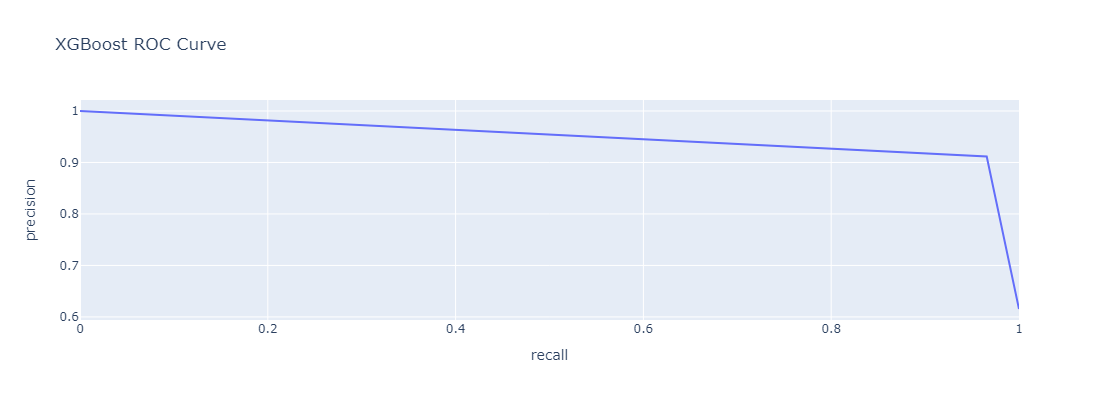

In [114]:
xgb_predict = best_xgb.predict(x)
print('F1_Score of Hypertuned XGBClassifier model:')
print(f1_score(y,xgb_predict))
print('Accuracy of Hypertuned XGBClassifier model:')
print(accuracy_score(y,xgb_predict))
print('Confusion Matrix of Hypertuned XGBClassifier model:')
print(confusion_matrix(y,xgb_predict))
print('Precision_Recall_Curve of Hypertuned XGBClassifier model:')
ROC_data = precision_recall_curve(y,xgb_predict)
print(ROC_data)
ROC = {'precision':[0.61538462, 0.91150442, 1],'recall':[1.      , 0.965625, 0]}
ROC_df = pd.DataFrame(ROC)
print(ROC_df)
ROC_curve = px.line(ROC_df,x='recall',y='precision',title='XGBoost ROC Curve',width=500,height=400)
ROC_curve.show()

In [102]:
start_time=time.time()
dt_model = DecisionTreeClassifier()
print(dt_model)
dt_model.fit(x_train,y_train)
end_time = time.time()
print('Run Time:',end_time - start_time)

DecisionTreeClassifier()
Run Time: 0.0627140998840332


In [103]:
print('The F1_Score for the dt_model:', f1_score(y,dt_model.predict(x)))
print('The Accuracy Score for the dt_model:', accuracy_score(y,dt_model.predict(x)))
print('The Confusion Matrix for dt_model:')
print(confusion_matrix(y,dt_model.predict(x)))
print('Cross Validation score of the xgb_mode:')
start_time=time.time()
print(cross_val_score(dt_model,x,y,cv=5))
end_time = time.time()
print('Cross Validation Run Time:', end_time - start_time)
print('The Mean Cross Validation for the dt_model:')
print(np.mean(cross_val_score(dt_model,x,y,cv=5)))
print('The Precision_Recall_Curve:')
print(precision_recall_curve(y,dt_model.predict(x)))

The F1_Score for the dt_model: 0.989010989010989
The Accuracy Score for the dt_model: 0.9865384615384616
The Confusion Matrix for dt_model:
[[198   2]
 [  5 315]]
Cross Validation score of the xgb_mode:
[0.92307692 0.97115385 0.92307692 0.99038462 0.99038462]
Cross Validation Run Time: 0.41384124755859375
The Mean Cross Validation for the dt_model:
0.9596153846153845
The Precision_Recall_Curve:
(array([0.61538462, 0.99369085, 1.        ]), array([1.      , 0.984375, 0.      ]), array([0, 1], dtype=int64))


In [106]:
## Hypertuning Randomforestclassifier model 
parameters={
    'splitter':['best','random'],
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6],
    'min_samples_split':[2,3,4,5,6,7,8],
    'min_samples_leaf':[2,3,4,5,6,7,8]
}
start_time=time.time()
hdt=RandomizedSearchCV(dt_model,parameters,cv=5,n_jobs=-1)
hdt.fit(x_train,y_train)
best_dt = hdt.best_estimator_
print(best_dt)
end_time= time.time()
print('Hypertuning runtime:',end_time - start_time)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=7,
                       splitter='random')
Hypertuning runtime: 9.241222143173218


F1_Score of Hypertuned DecisionTree model:
0.9360374414976598
Accuracy Score of Hypertuned DecisionTree model:
0.9211538461538461
Confusion Matrix of Hypertuned DecisionTree model:
[[179  21]
 [ 20 300]]
Precision_Recall_Curve of Hypertuned DecisionTree model:
(array([0.61538462, 0.93457944, 1.        ]), array([1.    , 0.9375, 0.    ]), array([0, 1], dtype=int64))
   precision  recall
0   0.615385  1.0000
1   0.934579  0.9375
2   1.000000  0.0000


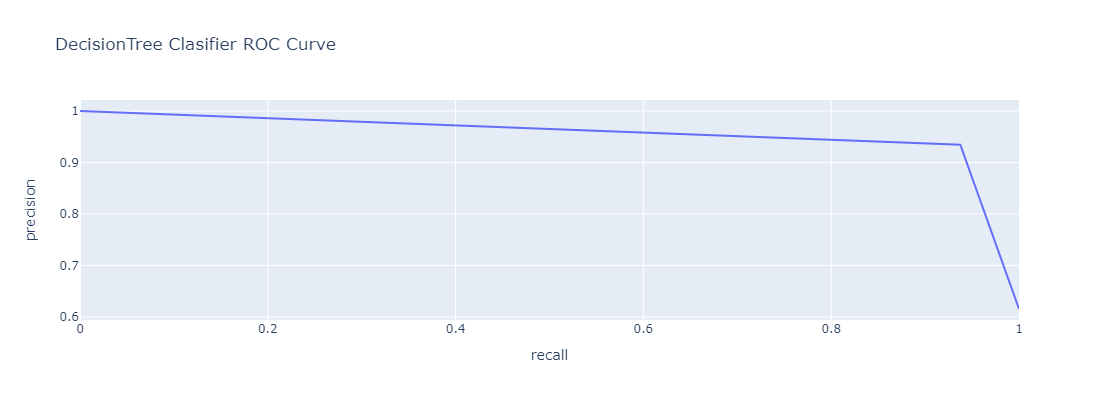

In [117]:
dt_predict = best_dt.predict(x)
print('F1_Score of Hypertuned DecisionTree model:')
print(f1_score(y,dt_predict))
print('Accuracy Score of Hypertuned DecisionTree model:')
print(accuracy_score(y,dt_predict))
print('Confusion Matrix of Hypertuned DecisionTree model:')
print(confusion_matrix(y,dt_predict))
print('Precision_Recall_Curve of Hypertuned DecisionTree model:')
ROC_data = precision_recall_curve(y,dt_predict)
print(ROC_data)
ROC = {'precision':[0.61538462, 0.93457944, 1],'recall':[1.    , 0.9375, 0]}
ROC_df = pd.DataFrame(ROC)
print(ROC_df)
ROC_curve = px.line(ROC_df,x='recall',y='precision',title='DecisionTree Clasifier ROC Curve',width=500,height=400)
ROC_curve.show()

# Comprehensive Model Evaluation

## RandomForest Model (Before Hyperparameter Tuning - rf_model)

- **F1 Score:** 0.9984
- **Accuracy Score:** 0.9981
- **Confusion Matrix:** [[200   0] [  1 319]]
- **Cross Validation Score:** [0.9615, 0.9808, 0.9231, 1.0, 1.0]
- **Cross Validation Run Time:** 4.82 seconds
- **Mean Cross Validation:** 0.9769
- **Precision-Recall Curve:**
  - **Precision:** [0.6154, 1.0, 1.0]
  - **Recall:** [1.0, 0.9969, 0.0]
  - **Thresholds:** [0, 1]

## RandomForest Model (After Hyperparameter Tuning)

- **F1 Score:** 0.9671
- **Accuracy Score:** 0.9596
- **Confusion Matrix:** [[190  10] [ 11 309]]
- **Precision-Recall Curve:**
  - **Precision:** [0.6154, 0.9687, 1.0]
  - **Recall:** [1.0, 0.9656, 0.0]
  - **Thresholds:** [0, 1]

## GradientBoostingClassifier Model (Before Hyperparameter Tuning - gbc_model)

- **F1 Score:** 0.9969
- **Accuracy Score:** 0.9962
- **Confusion Matrix:** [[200   0] [  2 318]]
- **Cross Validation Score:** [0.9423, 0.9808, 0.9327, 0.9904, 0.9904]
- **Cross Validation Run Time:** 3.59 seconds
- **Mean Cross Validation:** 0.9673
- **Precision-Recall Curve:**
  - **Precision:** [0.6154, 1.0, 1.0]
  - **Recall:** [1.0, 0.9938, 0.0]
  - **Thresholds:** [0, 1]

## GradientBoostingClassifier Model (After Hyperparameter Tuning)

- **F1 Score:** 0.9969
- **Accuracy Score:** 0.9962
- **Confusion Matrix:** [[200   0] [  2 318]]
- **Precision-Recall Curve:**
  - **Precision:** [0.6154, 1.0, 1.0]
  - **Recall:** [1.0, 0.9938, 0.0]
  - **Thresholds:** [0, 1]

## XGBClassifier Model (Before Hyperparameter Tuning - xgb_model)

- **F1 Score:** 0.9953
- **Accuracy Score:** 0.9942
- **Confusion Matrix:** [[200   0] [  3 317]]
- **Cross Validation Score:** [0.9519, 0.9808, 0.9135, 0.9904, 1.0]
- **Cross Validation Run Time:** 2.10 seconds
- **Mean Cross Validation:** 0.9673
- **Precision-Recall Curve:**
  - **Precision:** [0.6154, 1.0, 1.0]
  - **Recall:** [1.0, 0.9906, 0.0]
  - **Thresholds:** [0, 1]

## XGBClassifier Model (After Hyperparameter Tuning)

- **F1 Score:** 0.9378
- **Accuracy Score:** 0.9212
- **Confusion Matrix:** [[170  30] [ 11 309]]
- **Precision-Recall Curve:**
  - **Precision:** [0.6154, 0.9115, 1.0]
  - **Recall:** [1.0, 0.9656, 0.0]
  - **Thresholds:** [0, 1]

## DecisionTree Model (After Hyperparameter Tuning)

- **F1 Score:** 0.9360
- **Accuracy Score:** 0.9212
- **Confusion Matrix:** [[179  21] [ 20 300]]
- **Precision-Recall Curve:**
  - **Precision:** [0.6154, 0.9346, 1.0]
  - **Recall:** [1.0, 0.9375, 0.0]
  - **Thresholds:** [0, 1]

### Conclusion:

- The RandomForest model before hyperparameter tuning achieved an impressive F1 Score of 0.9984 and an accuracy of 99.81%, making it a strong candidate for detecting early signs of diabetes.
- After hyperparameter tuning, the RandomForest model maintained a high F1 Score of 0.9671 and an accuracy of 95.96%, showing robust performance.
- GradientBoostingClassifier models demonstrated excellent performance both before and after hyperparameter tuning, with F1 Scores of 0.9969 and high accuracies.
- The XGBClassifier model, while strong before tuning, experienced a decrease in performance after tuning, with an F1 Score of 0.9378.
- The DecisionTree model, after tuning, showed good performance with an F1 Score of 0.9360.

Overall, the RandomForest model (after tuning) and GradientBoostingClassifier models (both before and after tuning) appear to be the top performers for detecting diabetes at an early stage.



## Recommendations

- Based on the evaluation, it is recommended to deploy the tuned RandomForest and GradientBoostingClassifier models for real-world applications.
- Continuous monitoring and periodic retraining of the models with new data are essential for maintaining optimal performance.
- Collaboration with healthcare professionals to incorporate domain knowledge and additional relevant features could enhance model accuracy.





